In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [3]:
df=pd.read_csv('glass.csv')


In [4]:
df


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
X = np.array(df.iloc[:,3:5])
y = np.array(df['Type'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))


Shape of X:(214, 2)
Shape of y:(214,)


In [9]:
from matplotlib.colors import ListedColormap
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])
# custome color maps


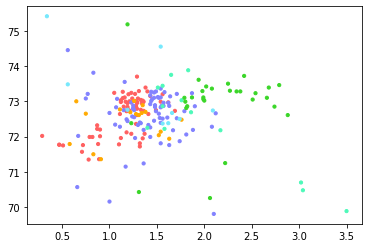

In [10]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()
# Create color maps


C:\Users\Hp User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of 

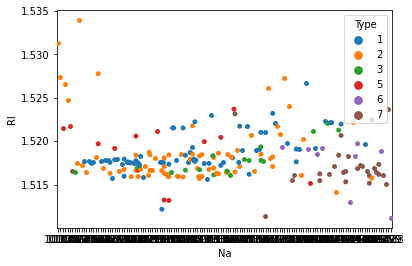

In [9]:
# plots using seaborn
sns.swarmplot(x='Na',y='RI',data=df,hue='Type')
import warnings
warnings.filterwarnings('ignore')



In [11]:

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))


Shape of X_Train:(160, 2)
Shape of y_Train:(160,)
Shape of X_Test:(54, 2)
Shape of y_Test:(54,)


In [12]:
# Using KNN to classify the glasses 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=3)

In [13]:
pred = knn.predict(X_train)
pred


array([1, 2, 1, 1, 7, 2, 2, 7, 5, 2, 2, 7, 1, 1, 2, 1, 2, 5, 1, 1, 3, 2,
       1, 1, 1, 7, 2, 7, 2, 1, 2, 6, 2, 6, 1, 2, 3, 1, 2, 1, 2, 2, 7, 1,
       1, 2, 2, 1, 1, 1, 3, 2, 2, 2, 7, 2, 7, 1, 2, 3, 2, 2, 1, 2, 7, 1,
       1, 3, 1, 3, 1, 5, 2, 2, 7, 2, 1, 1, 2, 5, 1, 1, 1, 6, 2, 2, 2, 1,
       1, 2, 2, 7, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 5, 2, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 3, 2, 1, 2, 7, 7, 2, 2, 1, 7, 1, 7, 3, 7, 2, 2, 2,
       7, 1, 1, 2, 1, 6, 2, 2, 1, 1, 2, 2, 1, 2, 7, 2, 1, 2, 7, 1, 3, 1,
       1, 7, 7, 1, 2, 1], dtype=int64)

In [14]:

accuracy = knn.score(X_train,Y_train)
print("The accuracy is :"+str(accuracy))


The accuracy is :0.76875


[[48  7  2  0  0  0]
 [ 7 42  0  0  0  2]
 [ 5  1  7  0  0  0]
 [ 1  4  1  4  0  0]
 [ 1  2  0  1  3  0]
 [ 0  2  0  0  1 19]]


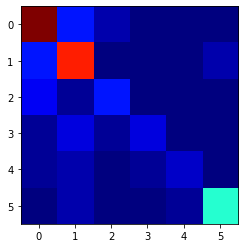

In [15]:
#computing confusion matrix 
cnf_matrix = confusion_matrix(Y_train,pred)
print(cnf_matrix)

#plotting the matrix in with plotly
plt.imshow(cnf_matrix,cmap=plt.cm.jet)


<AxesSubplot:>

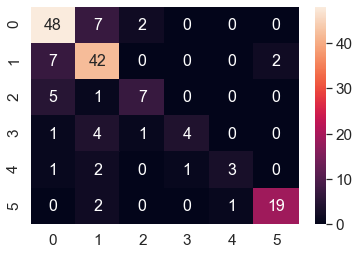

In [16]:
#visualizing the confusion matrix
df_cm = pd.DataFrame(cnf_matrix, range(6),range(6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
